2.0
[[30.   1.5  1. ]
 [ 3.   0.5  0. ]
 [ 1.   0.   0. ]]
[[1.00000000e+00 4.19379566e-13 2.54366565e-13]
 [8.83492074e-01 7.25214457e-02 4.39864803e-02]
 [5.76116885e-01 2.11941558e-01 2.11941558e-01]]
[[0.1        0.2        0.3        0.4       ]
 [0.16419776 0.26419776 0.36419776 0.46419776]
 [0.35432987 0.45432987 0.55432987 0.65432987]]


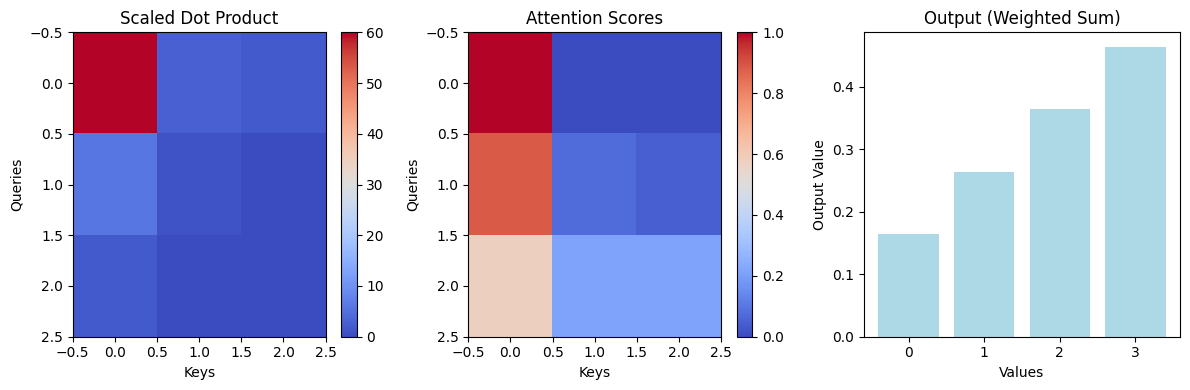

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# The scaled_dot_product_attention function is defined to perform the self-attention operation. 
# It takes three matrices as input: Q (Query), K (Key), and V (Value). Optionally, it can take a mask to hide certain positions.
# It calculates the dot product of Q and the transposed K, then scales it by dividing by the square root of the dimension of K.
# If a mask is provided, it adds a large negative value to the scaled dot product for the masked positions. 
# This effectively prevents the model from attending to those positions.

def scaled_dot_product_attention(Q, K, V, mask=None):
    # Compute the dot product of Query (Q) and Key (K)
    dot_product = np.dot(Q, K.T)
    
    # Scale the dot product by the square root of the dimension of Key
    scaled_dot = dot_product / np.sqrt(K.shape[-1])
    print(np.sqrt(K.shape[-1]))
    # Apply an optional mask to prevent attending to certain positions
    if mask is not None:
        scaled_dot += (mask * -1e9)  # A large negative value for masked positions
    print(scaled_dot)

    # Compute the attention scores by applying the softmax function
    attention_scores = softmax(scaled_dot, axis=-1)
    print(attention_scores)

    # Calculate the weighted sum of values (V) using the attention scores
    output = np.dot(attention_scores, V)
    print(output)
    
    return output, attention_scores

# The softmax function is used to calculate the attention scores based on the scaled dot product.
# The function computes the weighted sum of values (V) using the attention scores and returns both the output and the attention scores.
# The softmax function is a common activation function used in the attention mechanism. 
# It takes an input matrix x and calculates the softmax probabilities along a specified axis. It ensures that the values sum to 1 along that axis.

def softmax(x, axis):
    e_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return e_x / e_x.sum(axis=axis, keepdims=True)

# Here, we define example input matrices Q, K, and V to illustrate the self-attention mechanism.
# Example inputs with different values
Q = np.array([[1.0, 2.0, 3.0, 4.0],
              [0.0, 0.0, 1.0, 0.0],
              [1.0, 0.0, 0.0, 0.0]])

K = np.array([[2.0, 4.0, 6.0, 8.0],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 1.0, 0.0, 0.0]])

V = np.array([[0.1, 0.2, 0.3, 0.4],
              [0.5, 0.6, 0.7, 0.8],
              [0.9, 1.0, 1.1, 1.2]])


# We apply the scaled_dot_product_attention function to the example input matrices, resulting in an output and attention_scores.
output, attention_scores = scaled_dot_product_attention(Q, K, V)

# We create a figure with three subplots to visualize different aspects of the self-attention mechanism.
# The next part of the code visualizes three aspects:
# A heatmap of the scaled dot product between Query and Key matrices, showing the attention without normalization.
# A heatmap of the attention scores after applying the softmax function, demonstrating how much each Query attends to each Key.
# A bar chart representing the output of the self-attention mechanism, which is the weighted sum of Value matrices.

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Scaled Dot Product
im = axes[0].imshow(np.dot(Q, K.T), cmap='coolwarm', aspect='auto')
axes[0].set_title('Scaled Dot Product')
axes[0].set_xlabel('Keys')
axes[0].set_ylabel('Queries')
fig.colorbar(im, ax=axes[0])

# Attention Scores
im = axes[1].imshow(attention_scores, cmap='coolwarm', aspect='auto')
axes[1].set_title('Attention Scores')
axes[1].set_xlabel('Keys')
axes[1].set_ylabel('Queries')
fig.colorbar(im, ax=axes[1])

# Output (Weighted Sum)
axes[2].bar(range(V.shape[1]), output[1], color='lightblue')
axes[2].set_title('Output (Weighted Sum)')
axes[2].set_xticks(range(V.shape[1]))
axes[2].set_xlabel('Values')
axes[2].set_ylabel('Output Value')

axes[2].bar(range(V.shape[1]), output[1], color='lightblue')
axes[2].set_title('Output (Weighted Sum)')
axes[2].set_xticks(range(V.shape[1]))
axes[2].set_xlabel('Values')
axes[2].set_ylabel('Output Value')

plt.tight_layout()
plt.show()

